In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2021-04-23 19:31:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.71MB/s    in 0.3s    

2021-04-23 19:31:17 (1.71 MB/s) - ‘bank.zip’ saved [579043/579043]



In [3]:
# !sudo apt install unzip

In [4]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
df = pd.read_csv('bank-full.csv', sep=';', keep_default_na=True, na_values=['unknown'])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [8]:
df = df.drop(['contact', 'poutcome'], axis=1)

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [11]:
df.shape

(43193, 15)

In [12]:
print (df['education'].value_counts())
print (df['default'].value_counts())
print (df['housing'].value_counts())
print (df['loan'].value_counts())
print (df['y'].value_counts())

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64
no     42411
yes      782
Name: default, dtype: int64
yes    24292
no     18901
Name: housing, dtype: int64
no     36086
yes     7107
Name: loan, dtype: int64
no     38172
yes     5021
Name: y, dtype: int64


In [13]:
dict_yes_no = {'no': 0, 'yes': 1}
dict_education = {'primary': 0, 'secondary': 1, 'tertiary': 2}

In [14]:
list_col = ['default','housing','loan','y']

In [15]:
df['education'] = df['education'].map(dict_education)

In [16]:
for _ in list_col:
  df[_] = df[_].map(dict_yes_no)

In [17]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,2,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,-1,0,0
5,35,management,married,2,0,231,1,0,5,may,139,1,-1,0,0
6,28,management,single,2,0,447,1,1,5,may,217,1,-1,0,0


In [18]:
cat_features = ['job', 'marital', 'month']
df = pd.get_dummies(df, columns=cat_features)

In [19]:
X = df.drop('y', axis=1)
y = df['y']

In [20]:
X.shape

(43193, 37)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения
    tol=1e-4,
    # так как распознается 2 класса
    multi_class='ovr'
    )

In [22]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
preds = model.predict(X)

In [24]:
preds

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,37287,885
1,3661,1360


In [26]:
pred_prob = model.predict_proba(X)

In [27]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)


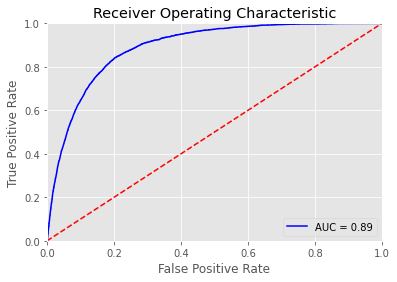

In [28]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()